Σωκράτης Γαλανομάτης, ΑΕΜ:10406

Αθανάσιος Γκόβτζιας, ΑΕΜ:10525

# Εργασία στην Αριθμητική Ανάλυση 

Λαμβάνοντας υπ' όψιν τα δεδομένα, μπορούμε να εργαστούμε στο πρόβλημα θεωρώντας τις μεταβολές των τριών κατηγοριών των κατοίκων ως ένα σύστημα διαφορικών εξισώσεων.
Αρχικά, παρατηρούμε ότι ισχύει

*Υ' + Ε' + Τ' = 0*

Άρα, το άθροισμα *Υ + Ε + Τ* παραμένει σταθερό. Έτσι υπολογίζουμε τις τιμές της *Τ*.

Τοποθετούμε τις αναμενόμενες τιμές σε πίνακες και τις απεικονίζουμε γραφικά.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
from scipy import optimize

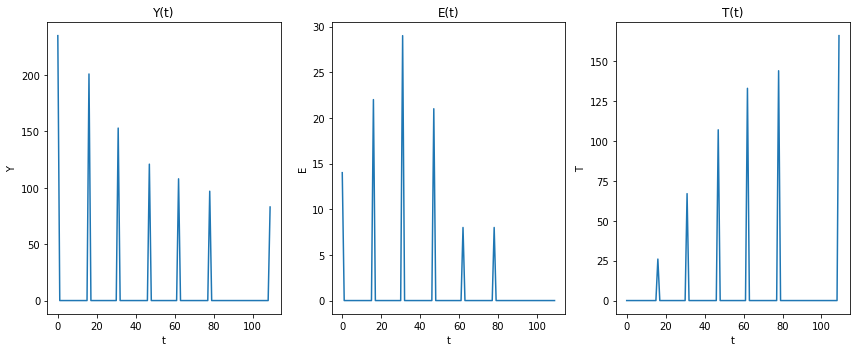

In [67]:
#tog is time original, aka the time array to which we're gonna base the table of given values
tog=np.arange(110)


fy=np.zeros(len(tog))
fy[0] = 235
fy[16] = 201
fy[31] = 153
fy[47] = 121
fy[62] = 108
fy[78] = 97
fy[109] = 83

fe=np.zeros(len(tog))
fe[0] = 14
fe[16] = 22
fe[31] = 29
fe[47] = 21
fe[62] = 8
fe[78] = 8
fe[109] = 0

ft=np.zeros(len(tog))
ft[0] = 0
ft[16] = 26
ft[31] = 67
ft[47] = 107
ft[62] = 133
ft[78] = 144
ft[109] = 166

#plotting for expected values
plt.figure(figsize = (12,5))

plt.subplot(131)
plt.plot(tog, fy)
plt.title('Y(t)')
plt.xlabel('t')
plt.ylabel('Y')
plt.subplot(132)
plt.plot(tog, fe)
plt.title('E(t)')
plt.xlabel('t')
plt.ylabel('E')
plt.subplot(133)
plt.plot(tog, ft)
plt.title('T(t)')
plt.xlabel('t')
plt.ylabel('T')

plt.tight_layout()
plt.show()

### Μέθοδος Runge-Kutta τέταρτης τάξης
Υλοποιούμε την μέθοδο Runge-Kutta τέταρτης τάξης ως συνάρτηση που επιστρέφει σε πίνακα:
- τους πίνακες *Y_plot*, *E_plot*, *T_plot*, που περιέχουν τις τιμές των *Υ*, *Ε*, *Τ* όπως υπολογίζονται από την μέθοδο,
- έναν πίνακα τιμών του *t (t_plot)* που αντιπροσωπεύει τον χρόνο σε μέρες (παίρνει τιμή 0 στην μέρα 0, τιμή 1 στην μέρα 1 ,κ.ο.κ, μέχρι την τιμή 109 που είναι η τελευταία μέρα, δηλαδή η 20η Οκτωβρίου) και χρησιμοποιείται στην απεικόνιση των τιμών των *Υ*, *Ε*, *Τ*,
- το βήμα *h*, το οποίο χρησιμοποιείται για την σωστή απεικόνιση των *Υ*, *Ε*, *Τ* που υπολογίζονται στην μέθοδο, σε συνδυασμό με τις αναμενόμενες τιμές τους, τις οποίες προσπαθούμε να προσεγγίσουμε.

Για την υλοποίηση της μεθόδου, ακολουθείται η εξής διαδικασία:
- Ορίζουμε συναρτήσεις *f1*, *f2*, *f3* που αντιστοιχούν στις εξισώσεις που δίνονται για τα *Υ'*, *Ε'* και *Τ'* αντίστοιχα, οι οποίες υπολογίζουν με βάση τις εξισώσεις, τις τιμές που παιρνουν οι *Υ'*, *Ε'*, *Τ'* για δοθέντα *a*, *b*, *Y*, *E*, *T*.
- Δίνουμε τις αρχικές τιμες *Υ(0)*, *Ε(0)* και *Τ(0)* και τις αποθηκεύουμε προσωρινά σε έναν πινακα *y*, για να χρησιμοποιηθεί στις μετέπειτα πράξεις της μεθόδου.
- Υπολογίζουμε τα k0, k1, k2, k3 και επαναθέτουμε στον πίνακα *y* τις νέες τιμές για τα *Y*, *E*, *T*, ενώ παράλληλα επεκτείνουμε τους πίνακες *t_plot*, *Y_plot*, *E_plot*, *T_plot*, τους οποίους πέρνουμε από την κλήση της συνάρτησης άδειους, με τις διαδοχικές τιμές των μεταβλητών, έτσι ώστε να αποθηκεύονται, για χρήση αργότερα.
- Σε κάθε κλήση της συνάρτησης, εκτυπώνονται οι γραφικές παραστάσεις, για την καλύτερη οπτικοποίησή της.

In [95]:
def rk4(a, b, t_plot, Y_plot, E_plot, T_plot): 
    
    #Functions for Y', E', T', named f1, f2 and f3 accordingly
    f1 = lambda a, Y, E: -a*Y*E
    f2 = lambda a, b, Y, E: a*Y*E - b*E
    f3 = lambda b, E: b*E

    #F is an array of Y', E' and T'
    def F(a, b, y):
        return np.array([f1(a, y[0], y[1]), f2(a, b, y[0], y[1]), f3(b, y[1])])

    #Initial values for Y, E, T
    Y = 235; E = 14; T = 0

    #Temporary storage for Y, E, T
    y = np.array([Y, E, T])

    #Temporary storage for t. Its values are stored in t_plot for plotting in the future
    t=0

   
    ti=0; tf=109
    
    #h is for steps, n is for the   for loop
    #The step can be changed manually from here for better proximity
    h=0.1
    
    n = int((tf - ti) / h)

    
    
    for i in range(1, n+1):
        t_plot = np.append(t_plot, [t]); Y_plot = np.append(Y_plot, [y[0]]);
        E_plot = np.append(E_plot, [y[1]]); T_plot = np.append(T_plot, [y[2]]);

        k0 = F(a, b, y)
        k1 = F(a, b, y + k0 * h/2)
        k2 = F(a, b, y + k1 * h/2)
        k3 = F(a, b, y + k2 * h)

        y = y + 1 / 6 * (k0 + 2 * k1 + 2 * k2 + k3) * h
        t = t + h

    t_plot = np.append(t_plot, [t]); Y_plot = np.append(Y_plot, [y[0]]);
    E_plot = np.append(E_plot, [y[1]]); T_plot = np.append(T_plot, [y[2]]);


    #Plotting for Y, E, T and their expected values
    plt.figure(figsize = (12,5))

    plt.subplot(131)
    plt.plot(t_plot, Y_plot, fy)
    plt.title(f'Y(t) with a={a} and b={b}')
    plt.xlabel('t')
    plt.ylabel('Y')
    plt.subplot(132)
    plt.plot(t_plot, E_plot, fe)
    plt.title('E(t)')
    plt.xlabel('t')
    plt.ylabel('E')
    plt.subplot(133)
    plt.plot(t_plot, T_plot, ft)
    plt.title('T(t)')
    plt.xlabel('t')
    plt.ylabel('T')

    plt.tight_layout()
    plt.show()
    plots = np.array([t_plot, Y_plot, E_plot, T_plot, h], dtype=object)
    return plots

### Υπολογισμός τετραγωνικού σφάλματος
Παρακάτω φαίνεται η συνάρτηση υπολογισμού τετραγωνικού σφάλματος. Η συνάρτηση αυτή θα εισέλθει σαν όρισμα στην συνάρτηση *optimize.minimize*, έτσι ώστε να ελαχιστοποιηθεί. Η διαδικασία που ακολουθεί είναι η εξής:
- Δέχεται τα *a*, *b* ως ορίσματα.
- Δημιουργεί καινούργιους κενούς πίνακες που θα χρησιμοποιηθούν στην υλοποίηση της μεθόδου Runge-Kutta για την αποθήκευση των τιμών των *t*, *Υ*, *Ε*, *Τ*.
- Καλεί την συνάρτηση *rk4* με ορίσματα τα *a*, *b* και τους πίνακες *Υ*, *Ε*, *Τ*.
- Υπολογίζει και επιστρέφει το τετραγωνικό σφάλμα, κάνοντας χρήση των τιμών των *Υ*, *Ε*, *Τ* από την παραπάνω κλήση της *rk4*.

In [96]:
def error(params):
    a, b = params
    
    #create new empty arrays for t, Y, E, T
    t_plot = np.array([]); Y_plot = np.array([]); E_plot = np.array([]); T_plot = np.array([]); 
    
    #Call rk4 method for a, b, t, Y, E, T
    ploties = rk4(a, b, t_plot, Y_plot, E_plot, T_plot)
    y = ploties[1]
    e = ploties[2]
    t = ploties[3]
    h = ploties[4]
    
    erry = 0; erre = 0; errt = 0
    
    #array of squared errors for Y, E, T
    err = np.array([erry, erre, errt])
    
    n = np.array([0, 16, 31, 47, 62, 78, 109])
    
    for i in n:
        j = int(i/h)
        erry = erry + (y[j] - fy[i])**2
        erre = erre + (e[j] - fe[i])**2
        errt = errt + (t[j] - ft[i])**2
    
    errf = (1/len(n)) * (erry + erre + errt)
    
    return errf

### Ελαχιστοποίηση σφάλματος
Τέλος, χρησιμοποιούμε την συνάρτηση *optimize.minimize* με ορίσματα:
- την συνάρτηση υπολογισμού τετραγωνικού σφάλματος *error*
- τον πίνακα *initial_guess* που περιέχει τις αρχικές τιμές των *a*, *b*
- την μεταβλητή *bnds* που περιέχει τα επιθυμητά άνω και κάτω όρια των *a*, *b*

Επιλέγουμε από τις διαθέσιμες επιλογές μεθόδων της *minimize* την *SLSQP(Sequential Least SQuares Programming)*, έτσι ώστε να μπορούμε να θέσουμε τα όρια για τις τιμές των *a*, *b*

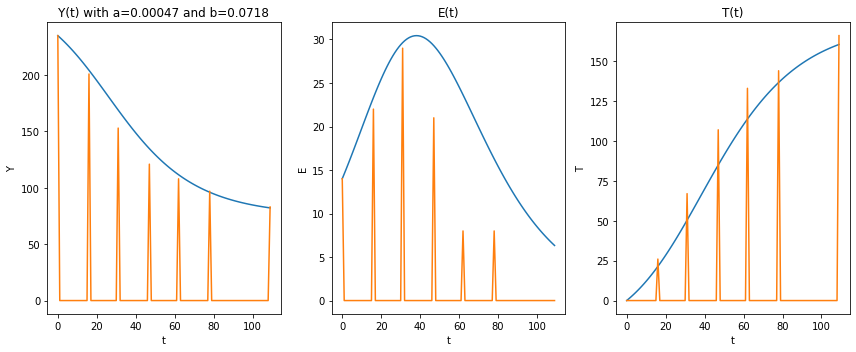

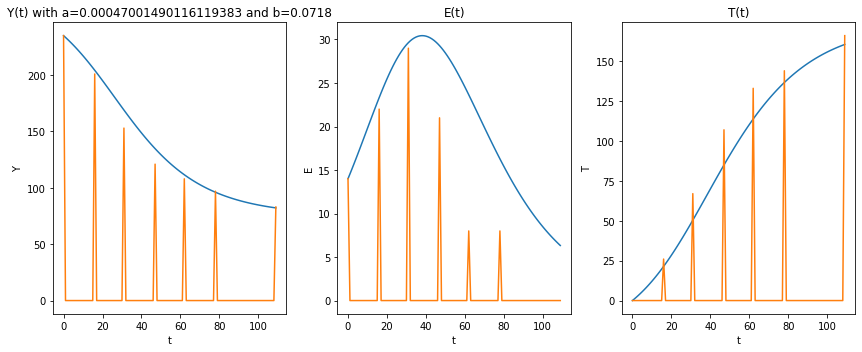

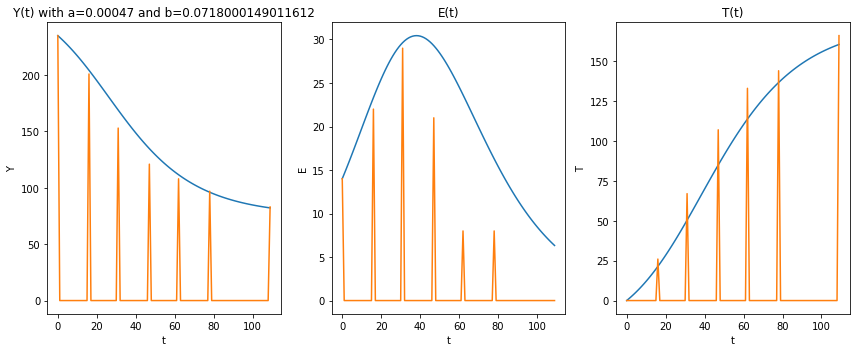

C:\Users\sokra\AppData\Local\Temp\ipykernel_23300\2113605062.py:4: RuntimeWarning: overflow encountered in double_scalars
  f1 = lambda a, Y, E: -a*Y*E
C:\Users\sokra\AppData\Local\Temp\ipykernel_23300\2113605062.py:5: RuntimeWarning: overflow encountered in double_scalars
  f2 = lambda a, b, Y, E: a*Y*E - b*E
C:\Users\sokra\AppData\Local\Temp\ipykernel_23300\2113605062.py:5: RuntimeWarning: invalid value encountered in double_scalars
  f2 = lambda a, b, Y, E: a*Y*E - b*E


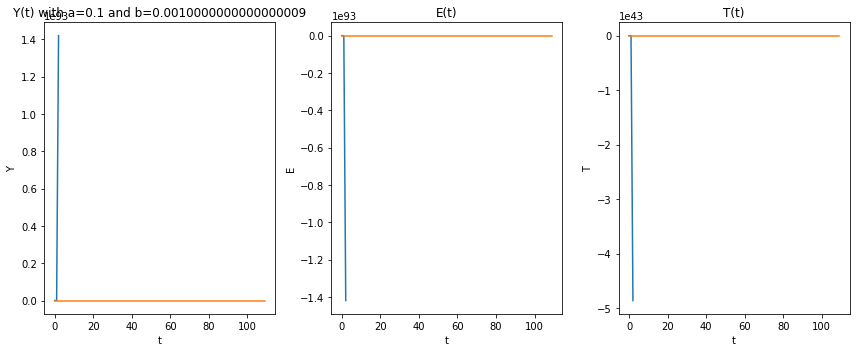

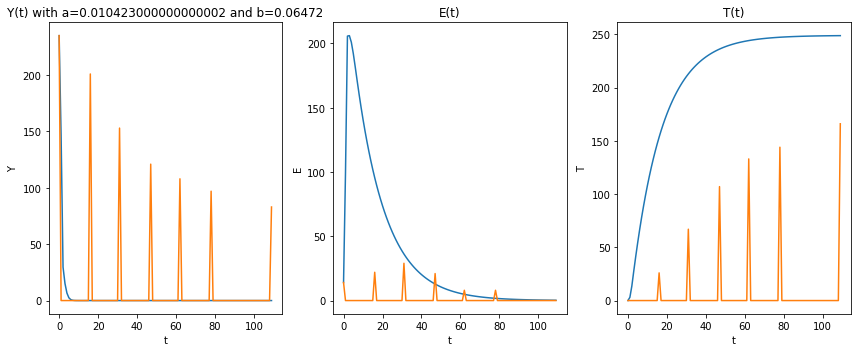

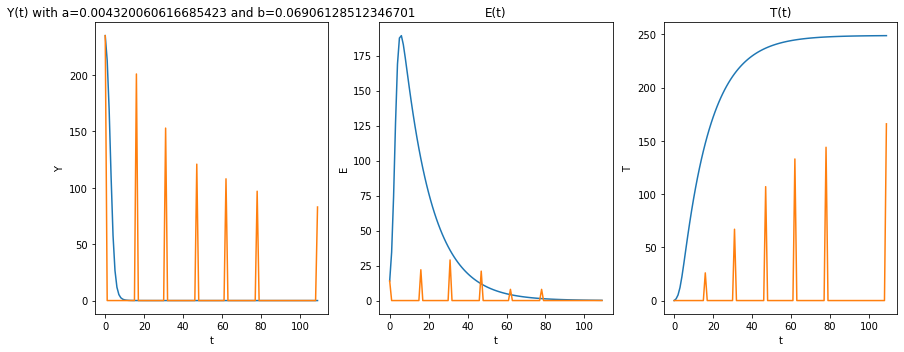

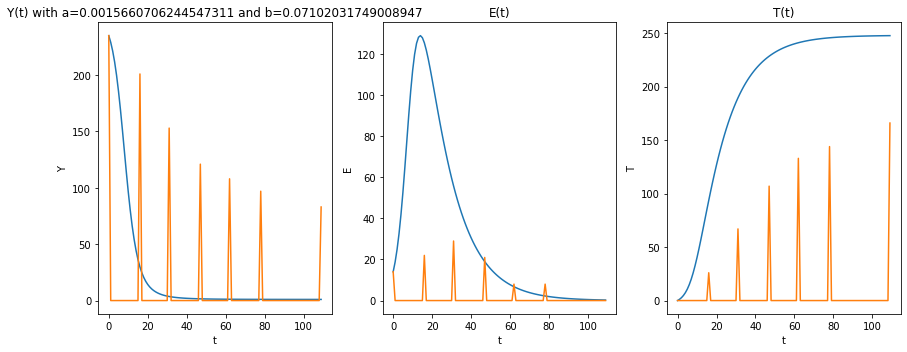

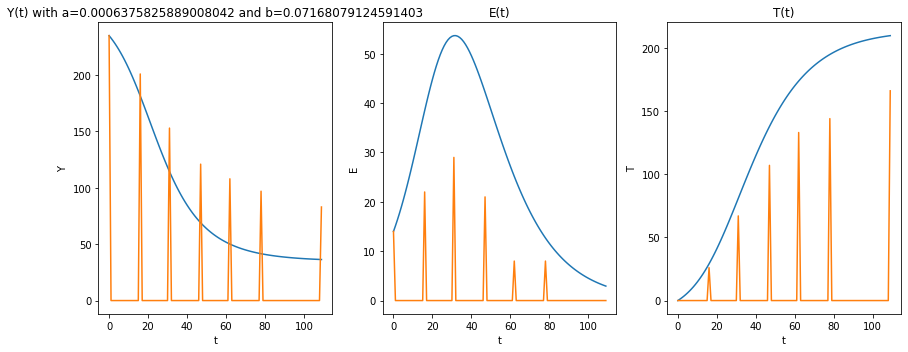

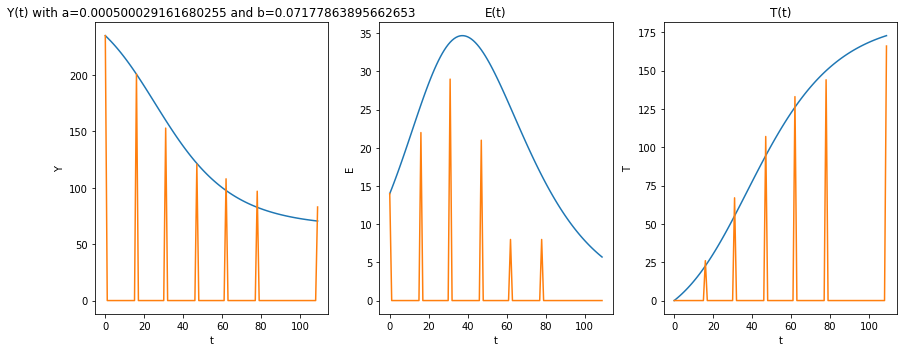

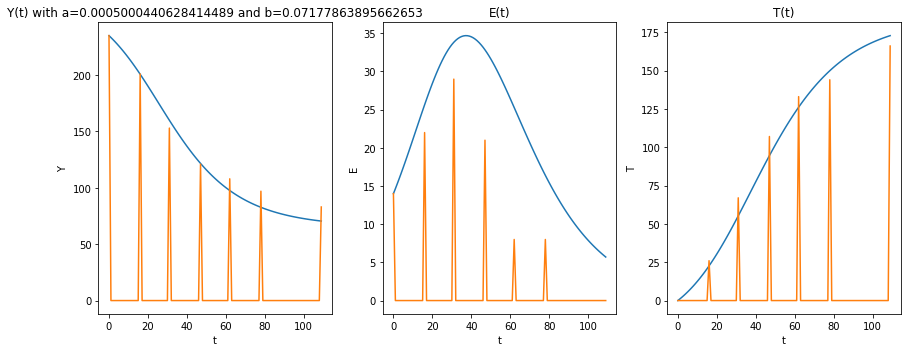

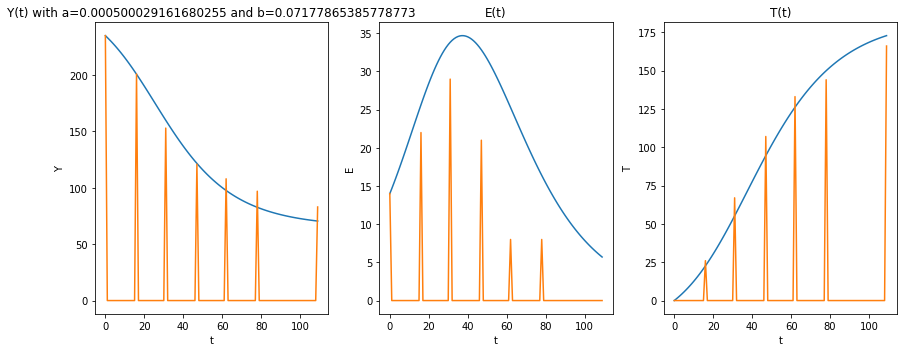

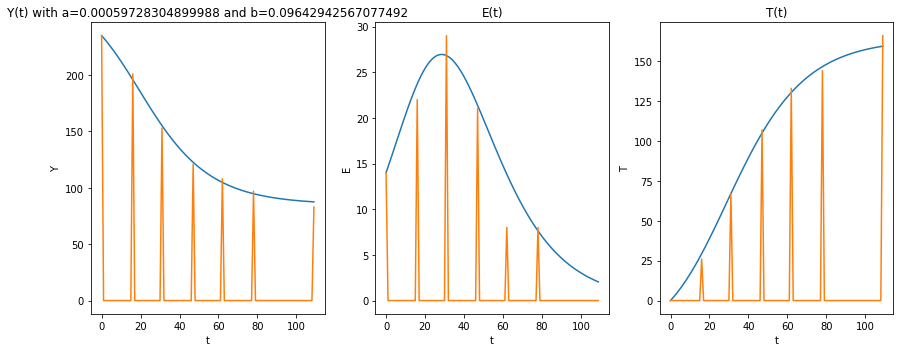

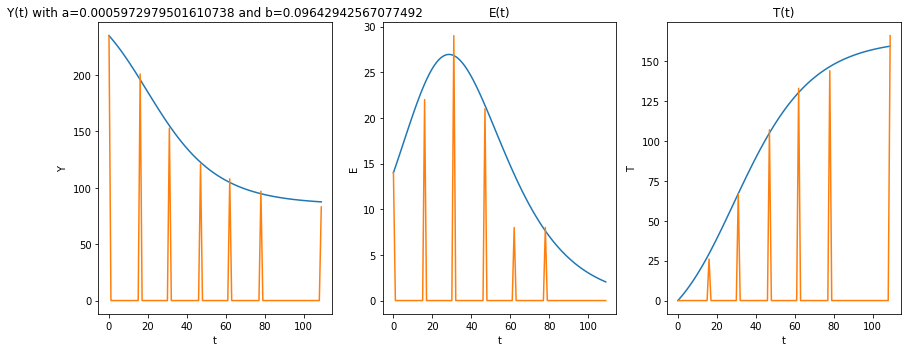

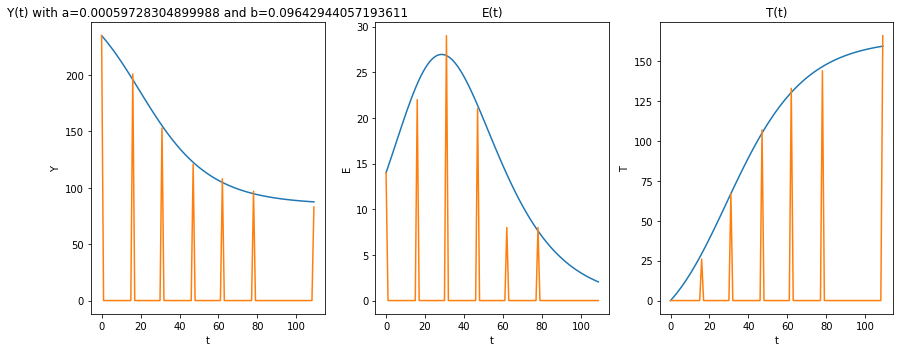

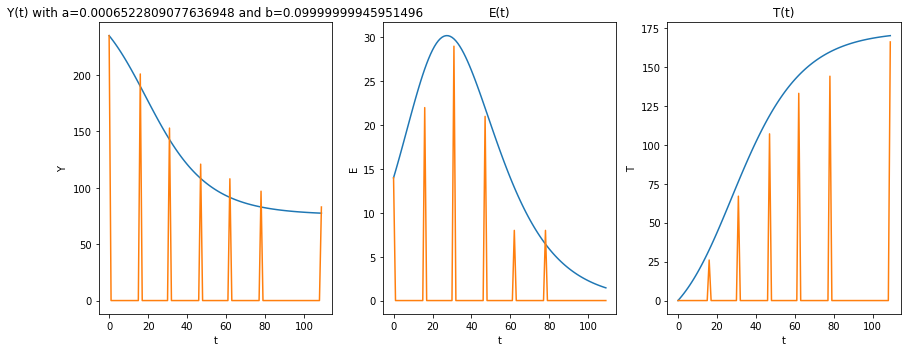

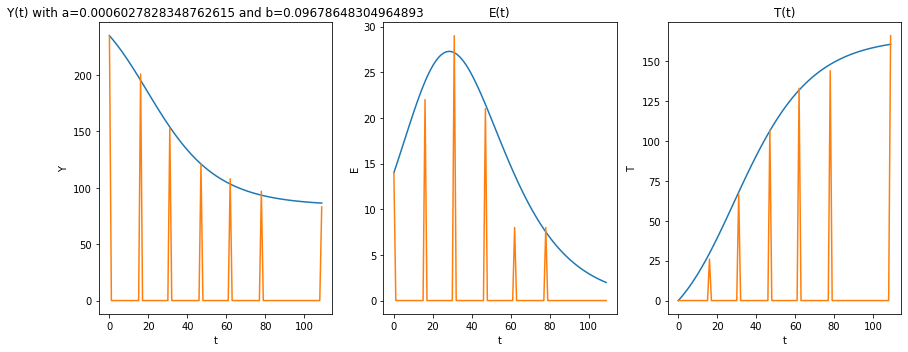

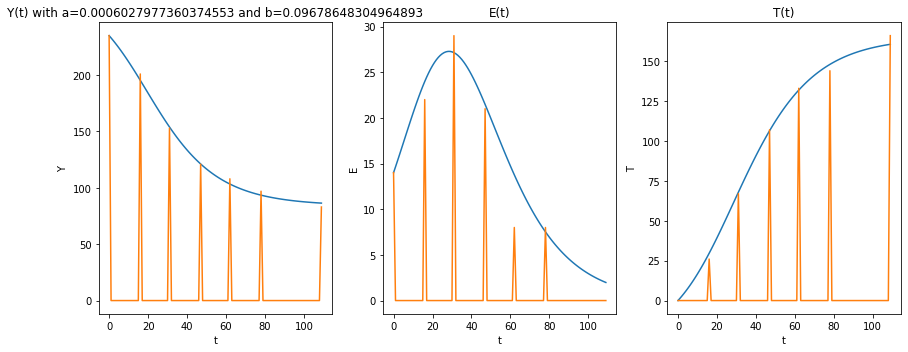

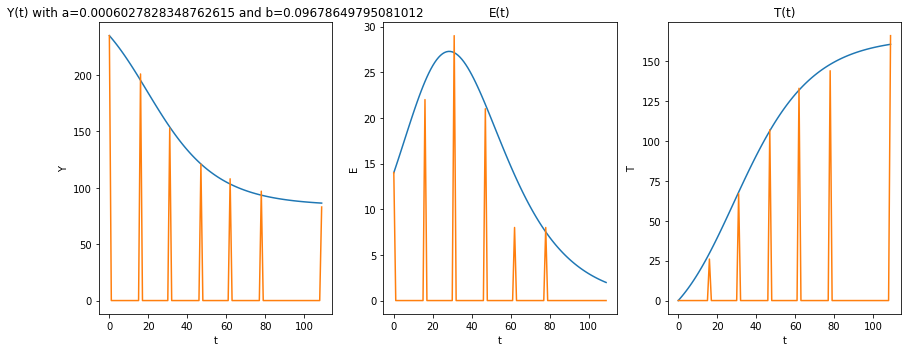

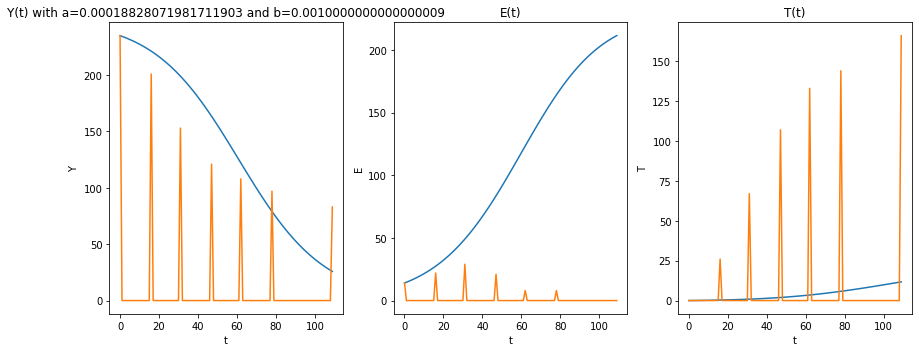

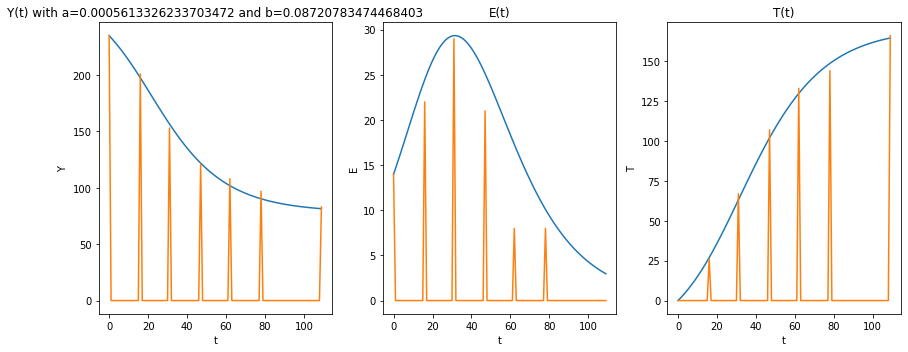

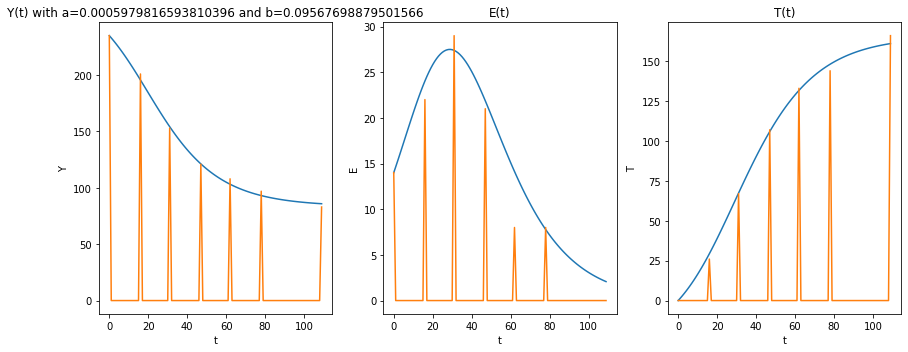

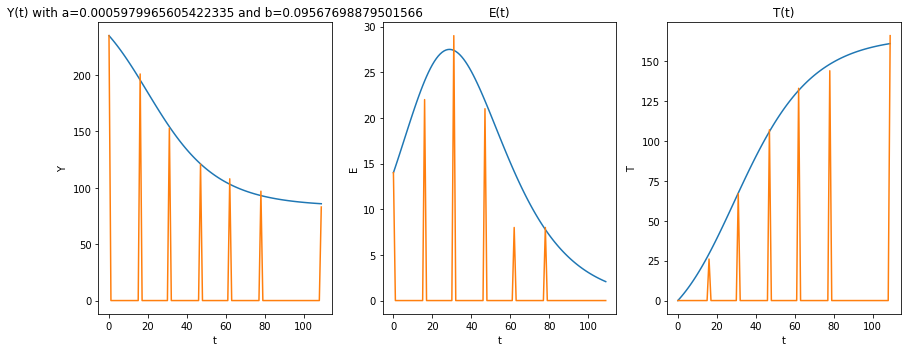

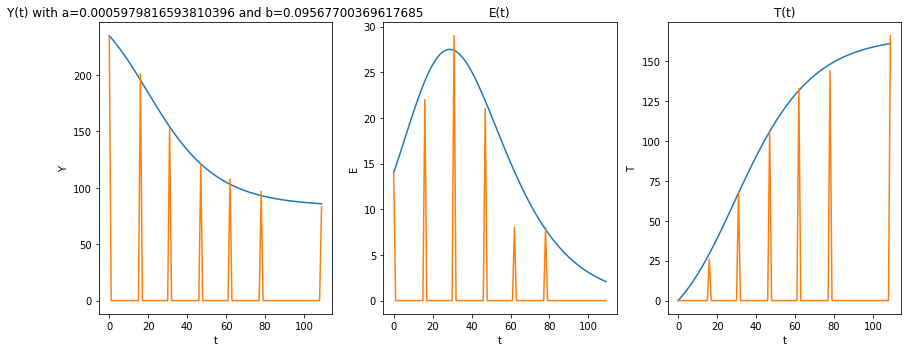

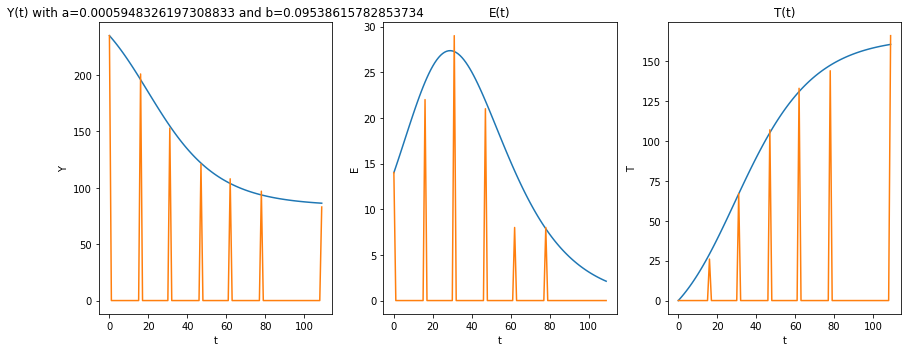

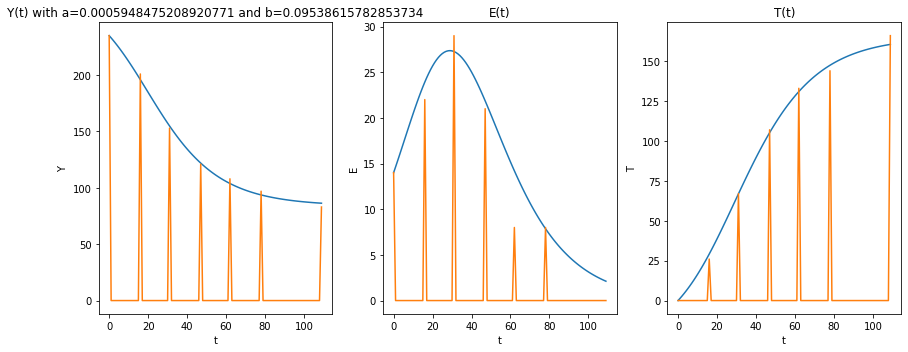

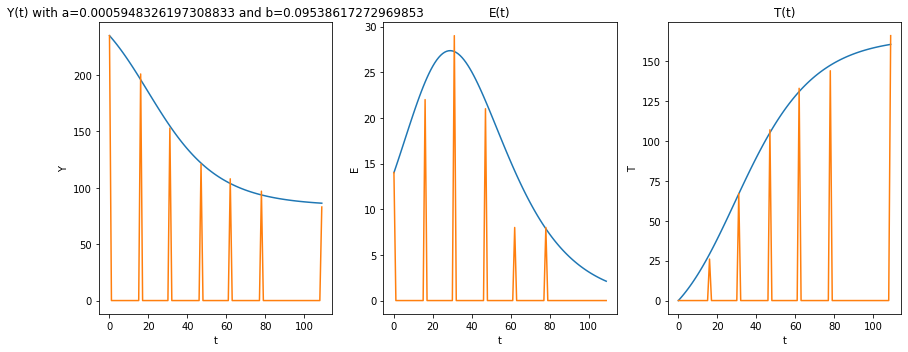

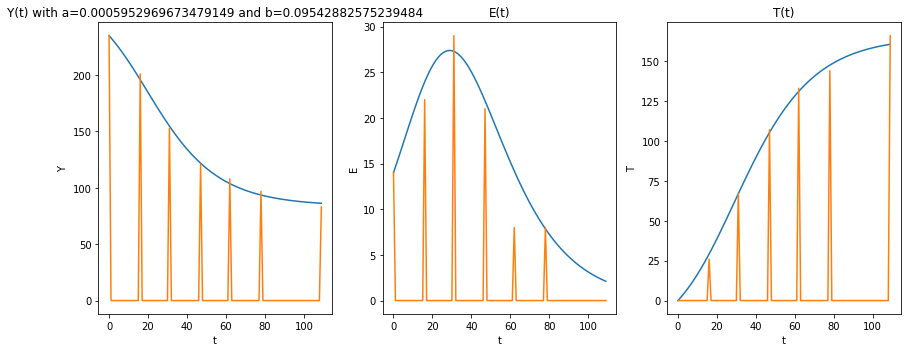

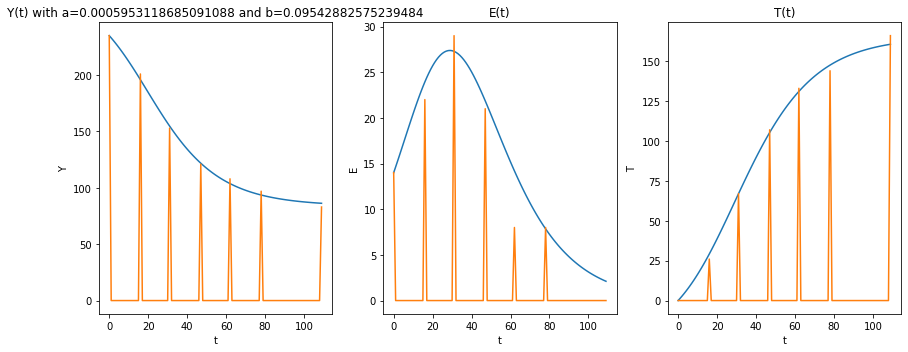

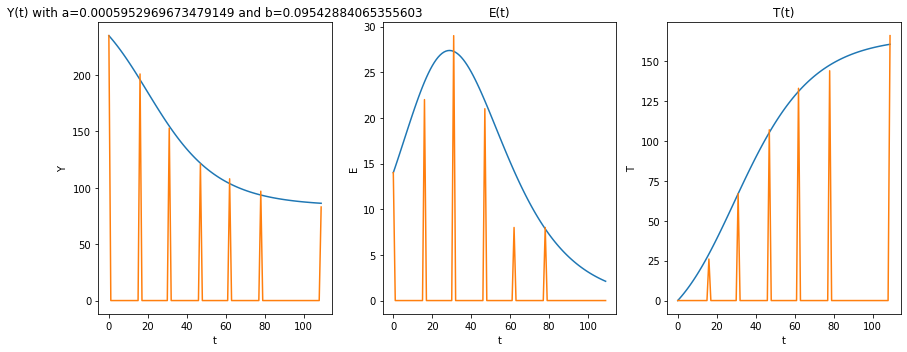

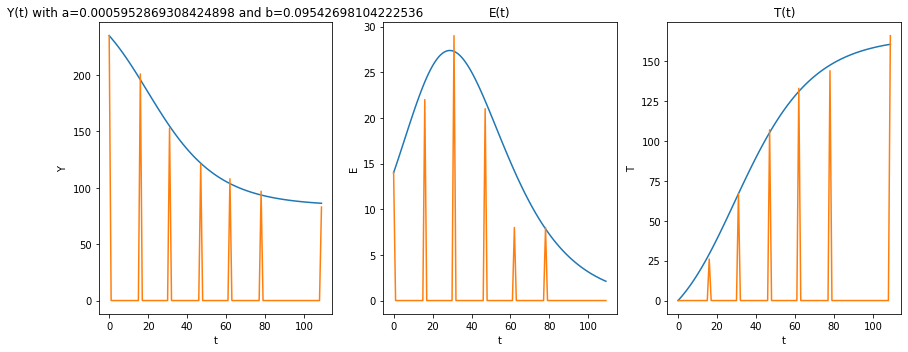

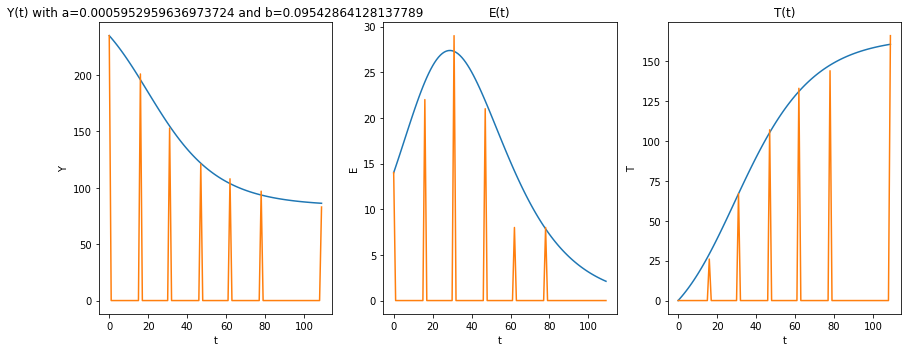

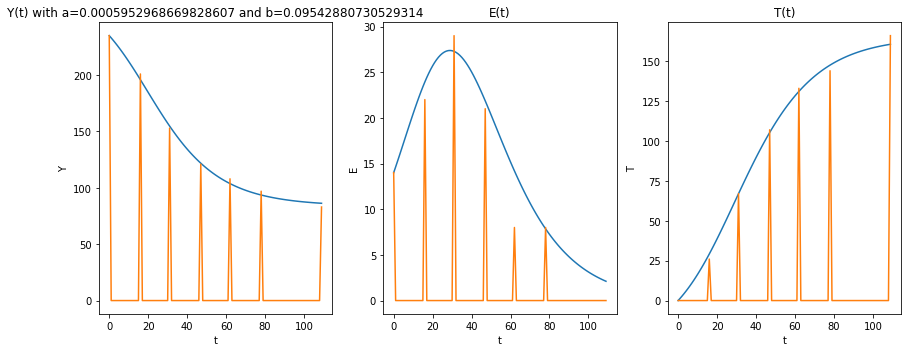

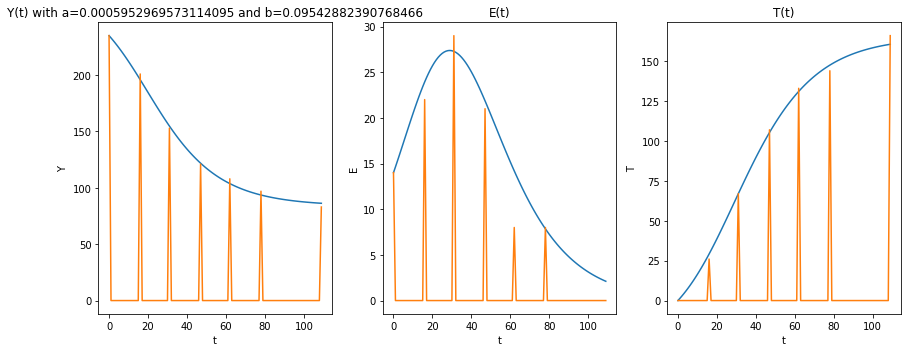

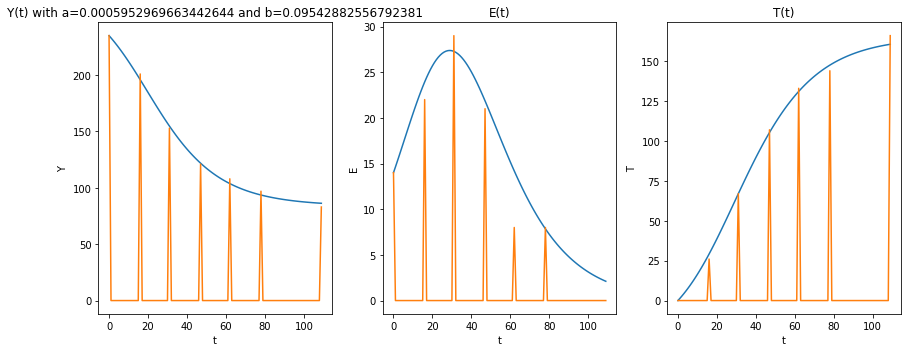

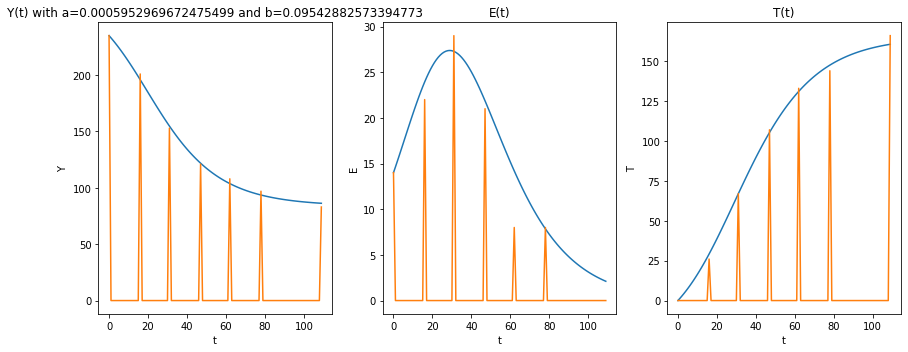

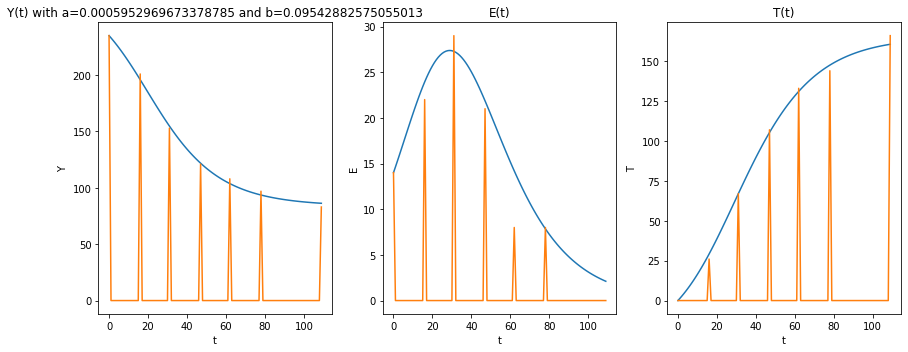

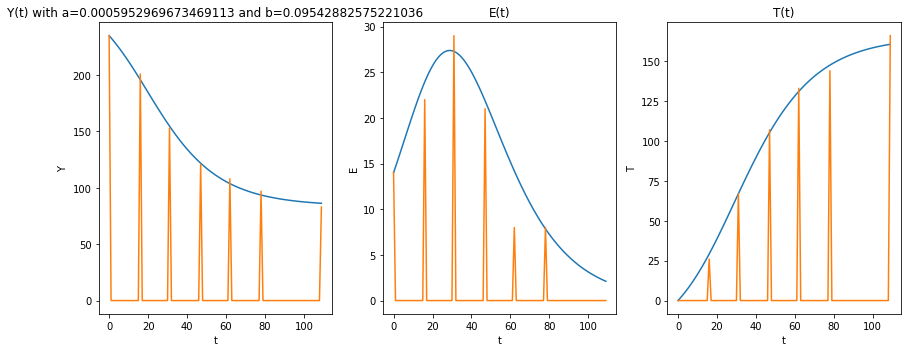

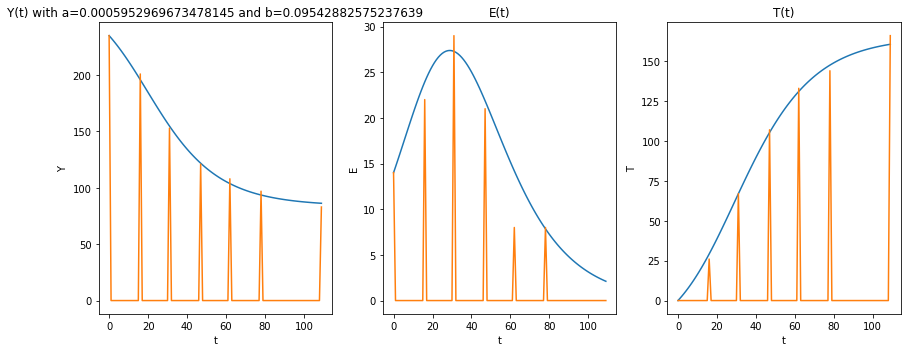

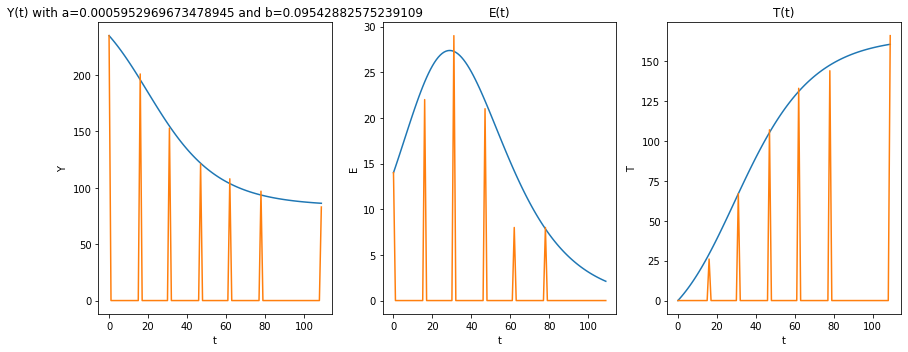

     fun: 25.57861894353074
     jac: array([612.75462008,  -1.88337898])
 message: 'Optimization terminated successfully'
    nfev: 39
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.0005953 , 0.09542883])


In [100]:
#boundaries for a
bda = (0.0001, 0.1)
#boundaries for b
bdb = (0.001, 0.1)

bnds = (bda, bdb)
#initial values for a, b
initial_guess = np.array([0.00047, 0.0718])

#use of optimize.minimize
result = optimize.minimize(error, initial_guess, bounds = bnds, method='SLSQP')

if result.success:
    print(result)
else:
    raise ValueError(result.message)

### Αποτελέσματα
Το αποτέλεσμα της ελαχιστοποίησης του σφάλματος με αρχικες τιμές για τα *a* και *b*, 0.00047 και 0.0718, αντίστοιχα, ήταν οι τιμές

**a = 0.0005953** και **b = 0.09542883**, με σφάλμα **error = 25.57861894353074**

Με αλλαγή του βήματος από 1 σε 0.1, παρατηρήθηκε μεγαλύτερη ακρίβεια στα αποτελέσματα για τα *a*, *b*, δηλαδή είχαμε

**a = 0.00059541** και **b = 0.09545058**, με σφάλμα **error = 25.578511246850116**

